In [1]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.exceptions import DataConversionWarning

from sklearn import model_selection

from sklearn.preprocessing import scale 
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression as lm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [2]:
# Read Files
College = pd.read_csv("./College.csv")
CollegeValues = pd.read_csv("./College.csv").values 

In [3]:
# Checking Data
len(College) 
College.head()
College = College.set_index(College.iloc[:, 0])

In [4]:


### ========= A =========



In [5]:
# Split Predict Labels
objective_label = College[['Apps']]   

objective_label.head()

,Apps
Unnamed: 0,
Abilene Christian University,1660
Adelphi University,2186
Adrian College,1428
Agnes Scott College,417
Alaska Pacific University,193


In [6]:
# Split Feature Lable
feature_label = College.drop(['Apps', College.columns[0], 'Private'], axis = 1)
feature_label.head()

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,
Abilene Christian University,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
feature_label.shape, objective_label.shape

((777, 16), (777, 1))

In [8]:
# Split Training and Testing Data
# data is split into 8 : 2 
# feature_train, feature_test
# objective_train, objective_test
feature_train, feature_test, objective_train, objective_test = train_test_split(feature_label,
                                                                                objective_label, 
                                                                                test_size = 0.2)

objective_train.shape , objective_test.shape
feature_train.shape, feature_test.shape

((621, 16), (156, 16))

In [9]:
#Verify
print(len(objective_train))
print(len(objective_test))
print(len(feature_train))
print(len(feature_test))

621
156
621
156


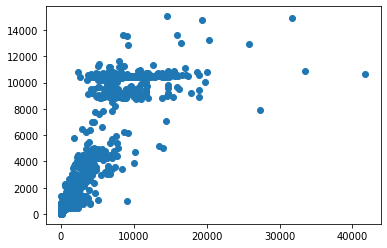

In [108]:
# a) Linear model using least squares 

model=lm().fit(objective_train,feature_train) 
predictions=model.predict(objective_test)
plt.scatter(feature_test,predictions)

In [100]:
# Accuracy
results = cross_val_score(model, feature_label, objective_label, cv = 10)
max_value = 0 
for i in results:
    if i > max_value:
        max_value = i
print("Test Accuracy is " ,max_value)

Test Accuracy is  0.9272757666729575


In [102]:
# Ridge 
# kfold cross validation score 
for k in [0, 0.01, 0.1]:
    ridge = Ridge(alpha=k)
    results = cross_val_score(ridge, feature_label, objective_label, cv = 10)
#     print(results)
print("Accuracy, " , results.mean() * 100)

Accuracy,  90.2011264850778
Accuracy,  90.20112672480354
Accuracy,  90.20112888228509


In [93]:
# Lasso 
for k in [0, 0.01, 0.1]:
    lasso = Lasso(alpha=k, max_iter=100000,fit_intercept=False, tol=0.000001 )
    results = cross_val_score(lasso, feature_label, objective_label, cv = 10)
#     print(results)

print("Accuracy, " , results.mean() * 100)

C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380712433.35919935, tolerance: 17339.589648999998
  positive)
C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

Accuracy,  90.12723995961922


In [105]:

# PCA

pca = PCA(n_components=2)
regr = lm()


max_score = 0 
max_index = 0
for i in np.arange(1, 16):
    pca = PCA(n_components = i)
    feature_label_pca = pca.fit_transform(feature_label)
    score = cross_val_score(regr, feature_label_pca, objective_label, cv=3).mean()
    #print(score)
    if score > max:
        max_score = score
        max_index = i
print("Accuracy is :", max_score)
print("Max index is :", max_index)

Accuracy is : 0.8999314662559589
Max index is : 15


In [107]:
# PLS
for i in np.arange(1, 16):
    pls = PLSRegression(n_components=i)
    results = cross_val_score(pls, feature_label, objective_label, cv=10).mean()
print("Accuracy is :", results)

Accuracy is : 0.9020126690246746
